<a href="https://colab.research.google.com/github/Ranjani94/Deep_Learning/blob/master/Assignment2/keras_google_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download your own dataset from google images, preprocess and classify using CNN and keras


urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));



Use these code snippets to download csv file which cotains the url of images from Google Image...

In [96]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Deep_Learning/'

Mounted at /content/gdrive


In [115]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import L1L2
from keras.callbacks import ReduceLROnPlateau

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import confusion_matrix
import itertools


import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2

print(tf.__version__)


2.2.0-rc3


In [93]:
pip install opencv-python

In [11]:
pip install requests

###Download images from the URL....


In [12]:
# import required packages
import requests
import cv2
import os
 
from imutils import paths
 
url_path = open('/content/gdrive/My Drive/Deep_Learning/DL_dataset/airplane.csv').read().strip().split('\n')
total = 0
 
if not os.path.exists('airplane'):
    os.mkdir('airplane')
image_path = 'airplane'
 
for url in url_path:
    try:
        req = requests.get(url, timeout=60)
 
        file_path = os.path.sep.join([image_path, '{}.jpg'.format(
            str(total).zfill(6))]
        )
        file = open(file_path, 'wb')
        file.write(req.content)
        file.close()
 
        print('Downloaded {}'.format(file_path))
        total += 1
 
    except:
        print('Could not download {}. Downloading next file'.format(file_path))

Downloaded airplaneC/000000.jpg
Downloaded airplaneC/000001.jpg
Downloaded airplaneC/000002.jpg
Downloaded airplaneC/000003.jpg
Downloaded airplaneC/000004.jpg
Downloaded airplaneC/000005.jpg
Downloaded airplaneC/000006.jpg
Downloaded airplaneC/000007.jpg
Downloaded airplaneC/000008.jpg
Downloaded airplaneC/000009.jpg
Downloaded airplaneC/000010.jpg
Downloaded airplaneC/000011.jpg
Downloaded airplaneC/000012.jpg
Downloaded airplaneC/000013.jpg
Downloaded airplaneC/000014.jpg
Downloaded airplaneC/000015.jpg
Downloaded airplaneC/000016.jpg
Downloaded airplaneC/000017.jpg
Downloaded airplaneC/000018.jpg
Downloaded airplaneC/000019.jpg
Downloaded airplaneC/000020.jpg
Downloaded airplaneC/000021.jpg
Downloaded airplaneC/000022.jpg
Downloaded airplaneC/000023.jpg
Downloaded airplaneC/000024.jpg
Downloaded airplaneC/000025.jpg
Downloaded airplaneC/000026.jpg
Downloaded airplaneC/000027.jpg
Downloaded airplaneC/000028.jpg
Downloaded airplaneC/000029.jpg
Downloaded airplaneC/000030.jpg
Download

In [0]:
# for imagePath in paths.list_images('airplane'):
#     delete_image = False
 
#     try:
#         image = cv2.imread(imagePath)
 
#         if image is None:
#             delete_image = True
 
#     # if OpenCV cannot load the image
#     except:
#         delete_image = True
 
#     if delete_image:
#         print('Deleting {}'.format(imagePath))
#         os.remove(imagePath)

###Images are loaded in drive..

In [0]:
filepath = base_dir + '/DL_dataset/'

In [0]:
np.random.seed(1234)
classes=["airplane","boat","car","bus","bike","train","rocket"]

all_arrays=[]
img_size=100
for i in classes:
    path=os.path.join(filepath,i)
    class_num=classes.index(i)
    for img in os.listdir(path):
        try:
          img_array=cv2.imread(os.path.join(path,img),
                              cv2.IMREAD_GRAYSCALE)
          img_array=cv2.resize(img_array,(img_size,img_size))
          all_arrays.append([img_array,class_num])
          if img_array is None:
              continue
 
    # if OpenCV cannot load the image
        except:
            #delete_image = True
            continue
        if delete_image:
          print('Deleting {}'.format(path))
          os.remove(imagePath)
        

In [0]:
automobile_array_train=[]
for features,label in all_arrays:
    automobile_array_train.append(features)

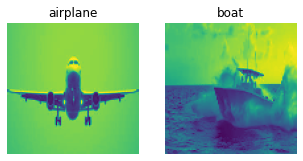

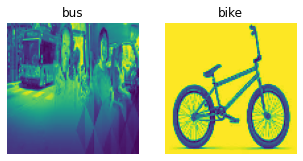

In [101]:
location=[[1,500],[1150,1500]]
automobile_names=["airplane","boat","bus","bike","car","train","rocket"]
a=0
b=1
c=2
for i,j in location:
    plt.subplots(figsize=(8,8))
    plt.subplot(1,3,1)
    plt.imshow(automobile_array_train[i])
    plt.title(automobile_names[a])
    plt.axis("off")
    plt.subplot(1,3,2)
    plt.imshow(automobile_array_train[j])
    plt.title(automobile_names[b])
    plt.axis("off")
    a+=2
    b+=2
  

In [0]:
import random
random.shuffle(all_arrays)

X_train=[]
Y_train=[]
for features,label in all_arrays:
    X_train.append(features)
    Y_train.append(label)
X_train=np.array(X_train) #arraying

# import random
# random.shuffle(all_arrays2)

# X_test=[]
# Y_test=[]
# for features,label in all_arrays2:
#     X_test.append(features)
#     Y_test.append(label)
# X_test=np.array(X_test) #arraying

In [103]:
#normalization and reshaping
X_train=X_train.reshape(-1,img_size,img_size,1)
X_train=X_train/255
# X_test=X_test.reshape(-1,img_size,img_size,1)
# X_test=X_test/255
print("shape of X_train= ",X_train.shape)
# print("shape of X_test=  ",X_test.shape)

shape of X_train=  (2239, 100, 100, 1)


In [0]:
from keras.utils import to_categorical
Y_train=to_categorical(Y_train,num_classes=7)
# Y_test=to_categorical(Y_test,num_classes=9)

In [0]:
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [106]:
x_train.shape

(1791, 100, 100, 1)

In [107]:
x_val.shape

(448, 100, 100, 1)

In [108]:
y_train.shape

(1791, 7)

In [109]:
y_val.shape

(448, 7)

###Building a model using CNN

In [0]:
from keras.layers.normalization import BatchNormalization
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(5,5),padding="Same",activation="relu",input_shape=(100,100,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=16,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(4,4),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(7,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

epochs=20
batch_size=36

In [125]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 100, 100, 8)       208       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 50, 50, 8)         32        
_________________________________________________________________
dropout_21 (Dropout)         (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 50, 50, 16)        2064      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 25, 25, 16)      

###Data Augmentation

In [0]:
# datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
#                            samplewise_center=False,  #set each sample mean to 0
#                            featurewise_std_normalization=False, #divide input datas to std
#                            samplewise_std_normalization=False,  #divide each datas to own std
#                            zca_whitening=False,  #dimension reduction
#                            rotation_range=0.5,    #rotate 5 degree
#                            zoom_range=0.5,        #zoom in-out 5%
#                            width_shift_range=0.5, #shift 5%
#                            height_shift_range=0.5,
#                            horizontal_flip=False,  #randomly flip images
#                            vertical_flip=False,
#                            )
# datagen.fit(x_train)

In [0]:
# #model fitting
# history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
#                             validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
#                            )

In [133]:
history = model.fit(x_train, y_train, batch_size = 10, epochs = 30, verbose = 1, validation_data=(x_val, y_val))

Epoch 1/30
180/180 [==============================] - 21s 115ms/step - loss: 1.0421 - accuracy: 0.6460 - val_loss: 2.2879 - val_accuracy: 0.3482
Epoch 2/30
180/180 [==============================] - 20s 112ms/step - loss: 0.8714 - accuracy: 0.6868 - val_loss: 1.3823 - val_accuracy: 0.5915
Epoch 3/30
180/180 [==============================] - 20s 112ms/step - loss: 0.7667 - accuracy: 0.7264 - val_loss: 1.5436 - val_accuracy: 0.5938
Epoch 4/30
180/180 [==============================] - 21s 114ms/step - loss: 0.6018 - accuracy: 0.7929 - val_loss: 1.5277 - val_accuracy: 0.5647
Epoch 5/30
180/180 [==============================] - 21s 115ms/step - loss: 0.5369 - accuracy: 0.8157 - val_loss: 1.4981 - val_accuracy: 0.5446
Epoch 6/30
180/180 [==============================] - 21s 115ms/step - loss: 0.4767 - accuracy: 0.8398 - val_loss: 1.8847 - val_accuracy: 0.5558
Epoch 7/30
180/180 [==============================] - 21s 114ms/step - loss: 0.4526 - accuracy: 0.8386 - val_loss: 1.2787 - val_ac

We have got accuracy of 96%

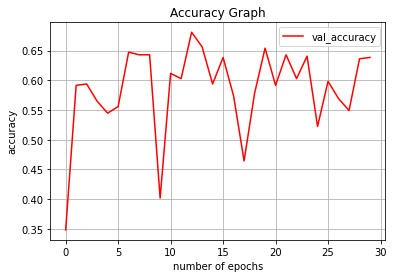

In [134]:
plt.plot(history.history["val_accuracy"],color="r",label="val_accuracy")
plt.title("Accuracy Graph")
plt.xlabel("number of epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid()
plt.show()

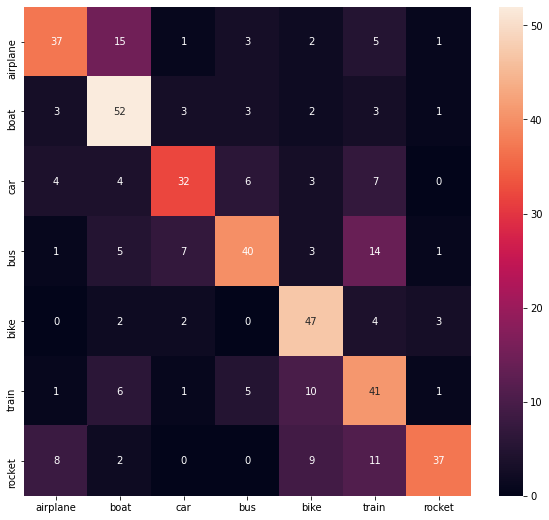

In [135]:
#confusion matrix
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_val,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
fruit_names=["airplane","boat","car","bus","bike","train","rocket"]
f,ax=plt.subplots(figsize=(10,9))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(fruit_names)
ax.set_yticklabels(fruit_names)
plt.show()